Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Data Collection and Pre-Processing

In [ ]:
# loading the data from the csv file to apandas dataframe
movies_data = pd.read_csv('/content/movies (1).csv')

In [ ]:
# printing the first 5 rows of the dataframe
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466.0,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106.0,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124.0,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [ ]:
# number of rows and columns in the data frame

movies_data.shape

(3803, 24)

In [ ]:
# selecting the relevant features for recommendation

selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [ ]:
# replacing the null valuess with null string

for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')

In [ ]:
# combining all the 5 selected features

combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']

In [ ]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
3798    Comedy Drama  At this wedding, the F-word stan...
3799    Adventure Action Thriller Crime terror scotlan...
3800    Comedy Fantasy Science Fiction loser bullying ...
3801    Drama alcohol adultery river camping province ...
3802                  Drama Comedy History Music usa c   
Length: 3803, dtype: object


In [ ]:
# converting the text data to feature vectors

vectorizer = TfidfVectorizer()

In [ ]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [ ]:
print(feature_vectors)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 101933 stored elements and shape (3803, 14271)>
  Coords	Values
  (0, 168)	0.07577282932028595
  (0, 231)	0.08632919377181453
  (0, 4302)	0.10802576820257555
  (0, 11170)	0.10320179465216496
  (0, 4445)	0.10320179465216496
  (0, 2984)	0.22966270902270833
  (0, 2470)	0.22650920234981672
  (0, 4789)	0.16480948984209962
  (0, 11824)	0.33546161530554675
  (0, 13661)	0.1232930946591323
  (0, 2600)	0.24656428256435192
  (0, 11732)	0.21411180371382496
  (0, 4026)	0.23704580996246924
  (0, 12557)	0.07036243677389624
  (0, 14021)	0.12649979551885573
  (0, 9174)	0.09074110662959094
  (0, 9425)	0.26949828881299615
  (0, 10963)	0.1497279083891937
  (0, 14029)	0.23314874891759038
  (0, 14250)	0.20672870277406408
  (0, 10938)	0.21411180371382496
  (0, 11558)	0.20357519610117245
  (0, 13732)	0.19804791484117856
  (0, 12012)	0.15282238422201547
  (0, 7186)	0.22966270902270833
  :	:
  (3800, 2951)	0.27294847194226385
  (3800, 9763)	0.2729484

Cosine Similarity

In [ ]:
# getting the similarity scores using cosine similarity

similarity = cosine_similarity(feature_vectors)

In [ ]:
print(similarity)

[[1.         0.06982297 0.03673202 ... 0.03461548 0.         0.        ]
 [0.06982297 1.         0.03134024 ... 0.01074155 0.         0.        ]
 [0.03673202 0.03134024 1.         ... 0.         0.         0.        ]
 ...
 [0.03461548 0.01074155 0.         ... 1.         0.         0.01699966]
 [0.         0.         0.         ... 0.         1.         0.01098429]
 [0.         0.         0.         ... 0.01699966 0.01098429 1.        ]]


here we get the similarity score for the combining feature for each movies

In [ ]:
print(similarity.shape)

(3803, 3803)


Getting the movie name from the user

In [ ]:
# getting the movie name from the user

movie_name = input(' Enter your favourite movie name : ')

 Enter your favourite movie name : spider man


In [ ]:
# creating a list with all the movie names given in the dataset

#movies_data['title'] = movies_data['title'].astype(str)
list_of_all_titles = movies_data['title'].tolist()
print(list_of_all_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [ ]:
# finding the close match for the movie name given by the user

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['Spider-Man', 'Inside Man', 'Superman']


In [ ]:
close_match = find_close_match[0]
print(close_match)

Spider-Man


In [ ]:
# finding the index of the movie with title

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]
print(index_of_the_movie)

159


In [ ]:
# getting a list of similar movies

similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, np.float64(0.057025537717241226)), (1, np.float64(0.027637829679153306)), (2, np.float64(0.027025549745821643)), (3, np.float64(0.0059909971328926765)), (4, np.float64(0.07529054568689995)), (5, np.float64(0.3155625603367919)), (6, np.float64(0.0)), (7, np.float64(0.00542812692856658)), (8, np.float64(0.019129949585663247)), (9, np.float64(0.01587177595954157)), (10, np.float64(0.032028639556323936)), (11, np.float64(0.004739979305688714)), (12, np.float64(0.016602486570628145)), (13, np.float64(0.016164031936210698)), (14, np.float64(0.01606363053623028)), (15, np.float64(0.010324791612890606)), (16, np.float64(0.005151091614686943)), (17, np.float64(0.015912630732948727)), (18, np.float64(0.0050924661459981506)), (19, np.float64(0.020678612224667485)), (20, np.float64(0.04421452862127144)), (21, np.float64(0.004489222634337915)), (22, np.float64(0.016841047795312376)), (23, np.float64(0.02746644089986896)), (24, np.float64(0.012106472594908213)), (25, np.float64(0.01237234121534

In [ ]:
len(similarity_score)

4803

In [ ]:
# sorting the movies based on their similarity score

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print(sorted_similar_movies)

[(68, 1.0000000000000002), (79, 0.40890433998005965), (31, 0.31467052449477506), (7, 0.23944423963486405), (16, 0.22704403782296803), (26, 0.21566241096831154), (85, 0.20615862984665329), (182, 0.19573956139611606), (511, 0.16702973947860686), (3623, 0.1609246088135586), (64, 0.15299924139445145), (203, 0.14818667948665118), (174, 0.1471993120942043), (4401, 0.14505971470107848), (101, 0.14401677581826294), (46, 0.14216268867232237), (169, 0.1380947013224906), (1740, 0.13624382641690763), (94, 0.1361681957902901), (788, 0.1330589507422922), (126, 0.13263982780511066), (131, 0.13137698586006535), (33, 0.13089810941050173), (2487, 0.12309731939910507), (783, 0.12162995562040377), (138, 0.11846458075866884), (2442, 0.11725512335483321), (661, 0.11719294096248463), (607, 0.11387063493435637), (38, 0.1126182690487113), (2651, 0.1121878787373205), (353, 0.1116846512704428), (122, 0.10850296033661253), (1553, 0.1079782217151326), (1451, 0.107849394974707), (242, 0.10630339022327012), (618, 0.

In [ ]:
# print the name of similar movies based on the index

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Iron Man
2 . Iron Man 2
3 . Iron Man 3
4 . Avengers: Age of Ultron
5 . The Avengers
6 . Captain America: Civil War
7 . Captain America: The Winter Soldier
8 . Ant-Man
9 . X-Men
10 . Made
11 . X-Men: Apocalypse
12 . X2
13 . The Incredible Hulk
14 . The Helix... Loaded
15 . X-Men: First Class
16 . X-Men: Days of Future Past
17 . Captain America: The First Avenger
18 . Kick-Ass 2
19 . Guardians of the Galaxy
20 . Deadpool
21 . Thor: The Dark World
22 . G-Force
23 . X-Men: The Last Stand
24 . Duets
25 . Mortdecai
26 . The Last Airbender
27 . Southland Tales
28 . Zathura: A Space Adventure
29 . Sky Captain and the World of Tomorrow


Movie Recommendation Sytem

In [ ]:
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = movies_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

 Enter your favourite movie name : bat man
Movies suggested for you : 

1 . Batman
2 . Batman Returns
3 . Batman & Robin
4 . The Dark Knight Rises
5 . Batman Begins
6 . The Dark Knight
7 . A History of Violence
8 . Superman
9 . Beetlejuice
10 . Bedazzled
11 . Mars Attacks!
12 . The Sentinel
13 . Planet of the Apes
14 . Man of Steel
15 . Suicide Squad
16 . The Mask
17 . Salton Sea
18 . Spider-Man 3
19 . The Postman Always Rings Twice
20 . Hang 'em High
21 . Spider-Man 2
22 . Dungeons & Dragons: Wrath of the Dragon God
23 . Superman Returns
24 . Jonah Hex
25 . Exorcist II: The Heretic
26 . Superman II
27 . Green Lantern
28 . Superman III
29 . Something's Gotta Give


In [ ]:
!pip install matplotlib


Enter your favourite movie name: bat man
Movies suggested for you:

1 . Batman
2 . Batman Returns
3 . Batman & Robin
4 . The Dark Knight Rises
5 . Batman Begins
6 . The Dark Knight
7 . A History of Violence
8 . Superman
9 . Beetlejuice
10 . Bedazzled
11 . Mars Attacks!
12 . The Sentinel
13 . Planet of the Apes
14 . Man of Steel
15 . Suicide Squad
16 . The Mask
17 . Salton Sea
18 . Spider-Man 3
19 . The Postman Always Rings Twice
20 . Hang 'em High
21 . Spider-Man 2
22 . Dungeons & Dragons: Wrath of the Dragon God
23 . Superman Returns
24 . Jonah Hex
25 . Exorcist II: The Heretic
26 . Superman II
27 . Green Lantern
28 . Superman III
29 . Something's Gotta Give
30 . Reds


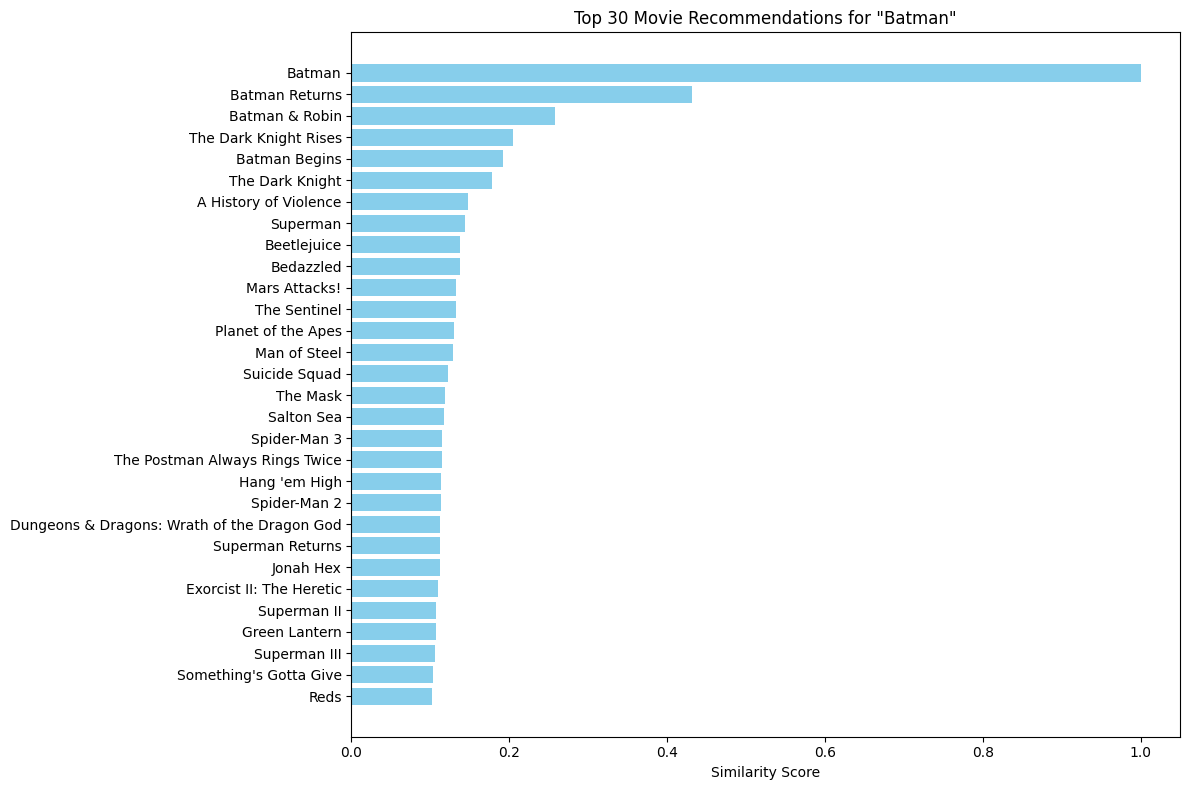

In [ ]:
import matplotlib.pyplot as plt

movie_name = input('Enter your favourite movie name: ')

list_of_all_titles = movies_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

if find_close_match:
    close_match = find_close_match[0]
else:
    print("No similar movie found.")
    exit()

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key=lambda x: x[1], reverse=True)

print('Movies suggested for you:\n')

recommended_movies = []
scores = []

i = 1
for movie in sorted_similar_movies:
    index = movie[0]
    title_from_index = movies_data[movies_data.index == index]['title'].values[0]
    if (i <= 20):
        recommended_movies.append(title_from_index)
        scores.append(movie[1])
        print(i, '.', title_from_index)
        i += 1
    else:
        break

# 🎨 Plot the graph
plt.figure(figsize=(12, 8))
plt.barh(recommended_movies[::-1], scores[::-1], color='skyblue')  # reverse to have rank 1 at top
plt.xlabel('Similarity Score')
plt.title(f'Top 30 Movie Recommendations for "{close_match}"')
plt.tight_layout()
plt.show()
